In [1]:
import os, sys, glob, json, scipy as sp
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))

In [3]:
BHMasses = np.asarray([data[i]["SMBHMASS"] for i in range(len(data))])
ProcaMasses = np.asarray([data[i]["PROCAMASS"] for i in range(len(data))])
Faith = np.asarray([data[i]["faithfulness"] for i in range(len(data))])

interps = []
bhmasses = []
newpran = []
for inx, b in enumerate(BHMasses):
    pmass = ProcaMasses[BHMasses==b]
    sorter = np.argsort(pmass)
    pmass = pmass[sorter]
    faith = Faith[BHMasses==b][sorter]
    if len(faith)<2:
        continue
    bhmasses.append(b)
    interps.append(sp.interpolate.interp1d(pmass, faith, bounds_error=False))

In [4]:
xdat = []
ydat = []
zdat = []
for inx, b in enumerate(bhmasses):
    for inx1, p in enumerate(np.arange(min(ProcaMasses), max(ProcaMasses), 1e-21)):
        xdat.append(b)
        ydat.append(p)
        zdat.append(interps[inx](p))

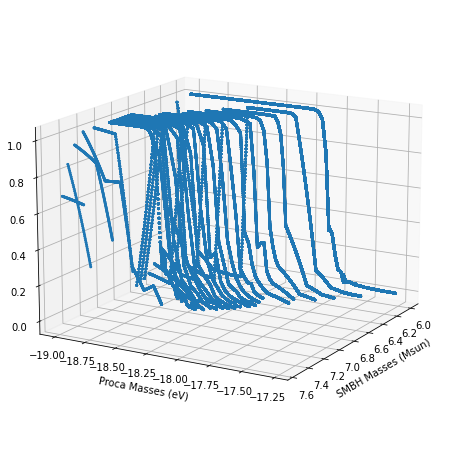

In [5]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (eV)")
ax.set_xlabel("SMBH Masses (Msun)")
ax.view_init(15,30)

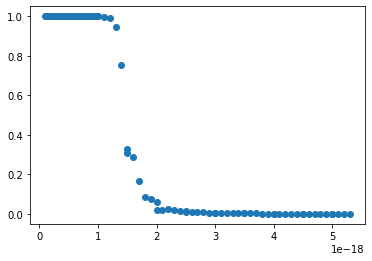

In [7]:
inxer = BHMasses==1e6
plt.scatter(ProcaMasses[inxer], Faith[inxer])

In [14]:
np.sort(ProcaMasses[inxer])

array([1.0e-19, 1.1e-19, 1.2e-19, 1.3e-19, 1.4e-19, 1.5e-19, 1.5e-19,
       1.6e-19, 1.7e-19, 1.8e-19, 1.9e-19, 2.0e-19, 2.0e-19, 2.1e-19,
       2.2e-19, 2.3e-19, 2.4e-19, 2.5e-19, 2.5e-19, 2.6e-19, 2.7e-19,
       2.8e-19, 2.9e-19, 3.0e-19, 3.0e-19, 3.1e-19, 3.2e-19, 3.3e-19,
       3.4e-19, 3.5e-19, 3.5e-19, 3.6e-19, 3.7e-19, 3.8e-19, 3.9e-19,
       4.0e-19, 4.0e-19, 4.1e-19, 4.2e-19, 4.3e-19, 4.4e-19, 4.5e-19,
       4.5e-19, 4.6e-19, 4.7e-19, 4.8e-19, 4.9e-19, 5.0e-19, 5.0e-19,
       5.1e-19, 5.2e-19, 5.3e-19, 5.4e-19, 5.5e-19, 5.5e-19, 5.6e-19,
       5.7e-19, 5.8e-19, 5.9e-19, 6.0e-19, 6.0e-19, 6.1e-19, 6.2e-19,
       6.3e-19, 6.4e-19, 6.5e-19, 6.5e-19, 6.6e-19, 6.7e-19, 6.8e-19,
       6.9e-19, 7.0e-19, 7.0e-19, 7.1e-19, 7.2e-19, 7.3e-19, 7.4e-19,
       7.5e-19, 7.5e-19, 7.6e-19, 7.7e-19, 7.8e-19, 7.9e-19, 8.0e-19,
       8.0e-19, 8.1e-19, 8.2e-19, 8.3e-19, 8.4e-19, 8.5e-19, 8.5e-19,
       8.6e-19, 8.7e-19, 8.8e-19, 8.9e-19, 9.0e-19, 9.0e-19, 9.1e-19,
       9.2e-19, 9.3e

In [16]:
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

In [19]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wave_generator = Pn5AAKWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)

# set initial parameters
M = 1e6
mu = 1e1
a = 0.2
p0 = 14.0
e0 = 0.6
iota0 = 0.1
Y0 = np.cos(iota0)
Phi_phi0 = 0.2
Phi_theta0 = 1.2
Phi_r0 = 0.8


qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1.0
mich = False
dt = 15.0
T = 2.0

waveform = wave_generator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,
                          Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)